In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import random
import re
import pandas as pd
%matplotlib inline

In [2]:
_map = json.load(open('citation_map_aborto.json'))

In [3]:
def normalizer(map_json):
    new_map = {}
    for k, v in map_json.items():
        key = k[9:]
        value = k
        if not new_map.get(key):
            new_map[key] = k
        elif int(new_map[key][:5]) < int(k[:5]):
            new_map[key] = k

    for k, v in new_map.items():
        new_map[k] = map_json[v]
    return new_map

In [4]:
with open("normalizado_citation_map_aborto_lista_de_adj.json", "w") as f:
    json.dump(normalizer(_map), f, indent=4)

### Janela de dois anos (2006 - 2016)

In [5]:
for ano in range(2005, 2016, 2):
    map_ano = {}
    for k in _map.keys():
        if ano == int(k[:4]) or (ano + 1) == int(k[:4]):
            map_ano[k] = _map[k]
    with open("normalizado_citation_map_aborto_%s-%s.json" % (ano, ano +1), "w") as f:
        json.dump(normalizer(map_ano), f, indent=4)

### Janela de um ano (2006 - 2016)

In [6]:
for ano in range(2005, 2017):
    map_ano = {}
    for k in _map.keys():
        if ano == int(k[:4]):
            map_ano[k] = _map[k]
    with open("normalizado_citation_map_aborto_%s.json" % (ano), "w") as f:
        json.dump(normalizer(map_ano), f, indent=4)

### Decisões por ano

In [7]:
distribuicao_ano = {}

for ano in range(2005, 2016):
    for k in _map.keys():
        if ano == int(k[:4]):
            if not distribuicao_ano.get(ano):
                distribuicao_ano[ano] = 0
            distribuicao_ano[ano] += 1
distribuicao_ano

{2005: 3,
 2006: 7,
 2007: 2,
 2008: 7,
 2009: 4,
 2010: 3,
 2011: 2,
 2012: 5,
 2013: 4,
 2014: 6,
 2015: 9}

Text(0.5,1,u'Decions per Year')

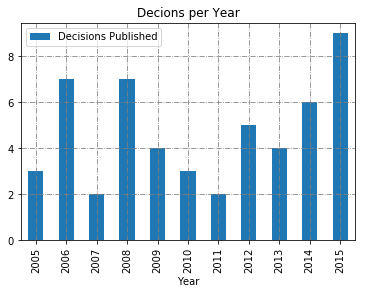

In [8]:
df = pd.DataFrame(distribuicao_ano.values(), index=distribuicao_ano.keys() ,columns=['Decisions Published'])
p = df.plot.bar()
p.grid(linestyle='-.', color='grey')
p.set_xlabel(u'Year')
p.set_title(u"Decions per Year")

### Número de Precedentes citados por ano

In [9]:
distribuicao = {}

for ano in range(2005, 2016):
    for k in _map.keys():
        if ano == int(k[:4]):
            if not distribuicao.get(ano):
                distribuicao[ano] = 0
            distribuicao[ano] += len(_map[k])
distribuicao

{2005: 22,
 2006: 18,
 2007: 27,
 2008: 38,
 2009: 12,
 2010: 8,
 2011: 11,
 2012: 42,
 2013: 21,
 2014: 34,
 2015: 72}

Text(0.5,1,u'Decisions vs. Precedents')

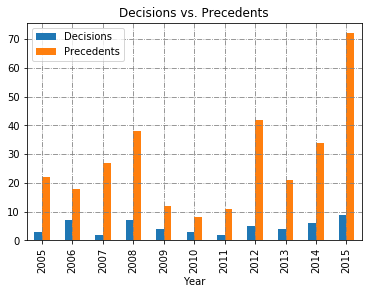

In [10]:
df = pd.DataFrame({'Decisions': distribuicao_ano.values(), 'Precedents': distribuicao.values()} , index=distribuicao_ano.keys(),
                  columns=['Decisions', 'Precedents'])
p = df.plot.bar()
p.grid(linestyle='-.', color='grey')
p.set_xlabel(u'Year')
p.set_title(u"Decisions vs. Precedents")